<a href="https://colab.research.google.com/github/jmohsbeck1/jpmc_mle/blob/labs/JPMC_Day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# BLUF - Bottom Line Up Front
# Today:  Outliers, Feature Selection
# BUT - before that... let's create a quick template for building models... Algorithm Harness

In [4]:
#Import your Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
%matplotlib inline

In [5]:
#df = pd.read_csv('https://raw.githubusercontent.com/fenago/classify/main/data/CreditScoring.csv')
#df.head()

In [6]:
# load a dataset from openML
# download IBM Attrition dataset
import ssl 
ssl._create_default_https_context = ssl._create_unverified_context
import certifi
from sklearn.datasets import fetch_openml 
# Download the dataset from openml
dataset = fetch_openml(data_id=43696, as_frame=True)
#Extract feature matrix X and show 5 random samples
df = dataset["frame"]
pd.set_option("display.max_columns", None)
df.sample(5)




/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
662,20,Yes,Travel_Rarely,500,Sales,2,3,Medical,1,922,3,Female,49,2,1,Sales Representative,3,Single,2044,22052,1,Y,No,13,3,4,80,0,2,3,2,2,2,0,2
200,27,No,Travel_Frequently,472,Research Development,1,1,Technical Degree,1,274,3,Male,60,2,2,Manufacturing Director,1,Married,4298,9679,5,Y,No,19,3,3,80,1,6,1,3,2,2,2,0
1250,29,No,Travel_Frequently,461,Research Development,1,3,Life Sciences,1,1753,4,Male,70,4,2,Healthcare Representative,3,Single,6294,23060,8,Y,Yes,12,3,4,80,0,10,5,4,3,2,0,2
522,37,No,Travel_Rarely,1225,Research Development,10,2,Life Sciences,1,715,4,Male,80,4,1,Research Scientist,4,Single,4680,15232,3,Y,No,17,3,1,80,0,4,2,3,1,0,0,0
334,45,No,Travel_Rarely,549,Research Development,8,4,Other,1,452,4,Male,75,3,2,Research Scientist,4,Married,3697,9278,9,Y,No,14,3,1,80,2,12,3,3,10,9,9,8


Notes
This session covers data collection and some procedures of data preparation.

Commands, functions, and methods:

!wget - Linux shell command for downloading data
pd.read.csv() - read csv files
df.head() - take a look of the dataframe
df.head().T - take a look of the transposed dataframe
df.columns - retrieve column names of a dataframe
df.columns.str.lower() - lowercase all the letters
df.columns.str.replace(' ', '_') - replace the space separator
df.dtypes - retrieve data types of all series
df.index - retrive indices of a dataframe
pd.to_numeric() - convert a series values to numerical values. The errors=coerce argument allows making the transformation despite some encountered errors.
df.fillna() - replace NAs with some value
(df.x == "yes").astype(int) - convert x series of yes-no values to numerical values.
df['Weight'] = df['Weight'].astype(int) - this takes a single column of data and converts the data type

In [7]:
len(df)

1470

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df.shape

(4455, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Status     4455 non-null   int64
 1   Seniority  4455 non-null   int64
 2   Home       4455 non-null   int64
 3   Time       4455 non-null   int64
 4   Age        4455 non-null   int64
 5   Marital    4455 non-null   int64
 6   Records    4455 non-null   int64
 7   Job        4455 non-null   int64
 8   Expenses   4455 non-null   int64
 9   Income     4455 non-null   int64
 10  Assets     4455 non-null   int64
 11  Debt       4455 non-null   int64
 12  Amount     4455 non-null   int64
 13  Price      4455 non-null   int64
dtypes: int64(14)
memory usage: 487.4 KB


In [ ]:
df.nunique()

Status          3
Seniority      47
Home            7
Time           11
Age            50
Marital         6
Records         2
Job             5
Expenses       94
Income        353
Assets        160
Debt          183
Amount        285
Price        1419
dtype: int64

In [ ]:
df.corr()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
Status,1.000000,-0.260312,0.051025,0.099935,-0.094498,0.010535,0.278638,0.152722,0.029499,0.059807,0.032989,0.062401,0.153771,0.010297
Seniority,-0.260312,1.000000,-0.145878,-0.021320,0.505787,0.163433,-0.015674,-0.109339,0.125798,-0.034262,0.026380,0.005725,-0.007859,0.040922
Home,0.051025,-0.145878,1.000000,-0.020880,-0.270784,-0.260712,-0.013205,-0.032042,-0.334092,-0.022968,-0.020389,-0.043584,-0.019560,-0.026542
Time,0.099935,-0.021320,-0.020880,1.000000,-0.051966,0.049978,0.028094,-0.138454,-0.001059,-0.020246,-0.039491,-0.051170,0.431050,0.129796
Age,-0.094498,0.505787,-0.270784,-0.051966,1.000000,0.325652,0.060171,0.179447,0.248254,0.010653,0.053084,0.015971,0.028907,0.048739
Marital,0.010535,0.163433,-0.260712,0.049978,0.325652,1.000000,0.082440,0.034105,0.210315,0.004463,-0.007824,0.000985,0.054130,0.062537
Records,0.278638,-0.015674,-0.013205,0.028094,0.060171,0.082440,1.000000,0.033898,0.057329,0.034741,0.004926,0.008197,0.110349,0.085143
Job,0.152722,-0.109339,-0.032042,-0.138454,0.179447,0.034105,0.033898,1.000000,0.024170,0.102801,0.049138,0.029067,0.055833,0.056497
Expenses,0.029499,0.125798,-0.334092,-0.001059,0.248254,0.210315,0.057329,0.024170,1.000000,0.010664,-0.023255,-0.018899,0.048958,0.040162
Income,0.059807,-0.034262,-0.022968,-0.020246,0.010653,0.004463,0.034741,0.102801,0.010664,1.000000,0.092042,0.116399,0.019659,0.023088


In [ ]:
# Basic Data Cleaning
df.columns = df.columns.str.lower().str.replace(' ', '_') # A
 
string_columns = list(df.dtypes[df.dtypes == 'object'].index) # B
 
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_') # C

In [ ]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [ ]:
# 999999999 - several values of that in the income, assets, and debt column
# if you ever need to replace values in a col -> here is your template for that
for c in ['income', 'assets','debt']:
  df[c] = df[c].replace(to_replace=99999999,value=np.nan)
# df = df[df.status != 'unk']
df.nunique()

status          3
seniority      47
home            7
time           11
age            50
marital         6
records         2
job             5
expenses       94
income        352
assets        159
debt          182
amount        285
price        1419
dtype: int64

In [ ]:
df['status'].unique()

array([1, 2, 0])

In [ ]:
df['status'].value_counts()

1    3200
2    1254
Name: status, dtype: int64

In [ ]:
df = df[df.status != 0]
df.status.value_counts() 

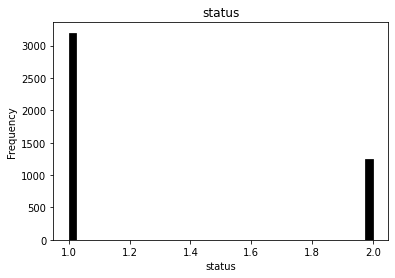

In [ ]:
# Replace with your target variable --- df.YOUR_TARGET_VARIABLE  
# Look for major data imbalances
# Also replace your X label
# REPLACE YOUR TARGET VARIABLE
plt.figure(figsize=(6, 4))

sns.histplot(df.status, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('status')
plt.title('status')

plt.show()

Notes
(1) Check for NaN under a single DataFrame column:

df['your column name'].isnull().values.any()

(2) Count the NaN under a single DataFrame column:

df['your column name'].isnull().sum()

(3) Check for NaN under an entire DataFrame:
df.isnull().values.any()

(4) Count the NaN under an entire DataFrame:
df.isnull().sum().sum()

In [ ]:
# Check for nulls --- you do NOT want nulls when you train
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

In [ ]:
#delete columns --- this may or may NOT be needed.  As before - skip if you don't need it
# You will encounter times where you will want to delete columns.  This is how you do that.
# df = df.drop(['x5_latitude', 'x6_longitude', 'x1_transaction_date'], axis=1)
# df

In [ ]:
# Split the data into test, train, validation sets... 80/20
from sklearn.model_selection import train_test_split
# This gives the 80/20 train test split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)

len(df_train_full), len(df_test)
# Replace nulls with 0's - these are pandas dataframes
df_train_full = df_train_full.fillna(0)

df_test = df_test.fillna(0)
len(df_train_full),len(df_test)

(3563, 891)

In [ ]:
#Split the y out into train/test/splits... these are numpy ndarrays ... msrp is your target variables
# Replace with your target variable!!!  
y_train = (df_train_full.status).values
y_test = (df_test.status).values
del df_train_full['status']
del df_test['status']

In [ ]:
len(y_train),len(y_test)


(3563, 891)

In [ ]:
# Convert these data frames into a LIST of DICTIONARIES (each element in the list is a dictionary (the record))
# IF YOU HAVE CAT values... we need to encode them... pandas get dummies OR dictionary vectorizor OR several other examples... allow us to encode
# this example will work with ANY cat data.
dict_train = df_train_full.to_dict(orient='records')
dict_test = df_test.to_dict(orient='records')

In [ ]:
# Convert the LIST OF DICTIONARIES into a Feature Matrix (does all of the encoding)
from sklearn.feature_extraction import DictVectorizer
 
dv = DictVectorizer(sparse=False)
 
X_train = dv.fit_transform(dict_train)
X_test = dv.transform(dict_test)
features = dv.feature_names_  #Features as they exist in the Vectorized Dictionary (this is an ndarray)

In [ ]:
features

['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home',
 'income',
 'job',
 'marital',
 'price',
 'records',
 'seniority',
 'time']

In [ ]:
X_test.shape

(891, 13)

LR: 0.780227 (0.015971)
Score for each of the 10 K-fold tests:  [0.80952381 0.79551821 0.78711485 0.78651685 0.78932584 0.76966292
 0.7752809  0.75       0.77247191 0.76685393]
LogisticRegression(solver='liblinear')
	Training time: 0.162s
	Prediction time: 1.310s

LDA: 0.776015 (0.018674)
Score for each of the 10 K-fold tests:  [0.80392157 0.78991597 0.79271709 0.75561798 0.8005618  0.76123596
 0.76966292 0.75561798 0.77808989 0.75280899]
LinearDiscriminantAnalysis()
	Training time: 0.019s
	Prediction time: 0.305s

KNN: 0.713435 (0.019846)
Score for each of the 10 K-fold tests:  [0.76190476 0.70868347 0.70028011 0.69382022 0.70505618 0.71910112
 0.69382022 0.71629213 0.73314607 0.70224719]
KNeighborsClassifier()
	Training time: 0.015s
	Prediction time: 0.304s

CART: 0.711467 (0.022328)
Score for each of the 10 K-fold tests:  [0.76470588 0.69467787 0.71708683 0.70786517 0.71910112 0.68539326
 0.73033708 0.69382022 0.71067416 0.69101124]
DecisionTreeClassifier()
	Training time: 0.030s
	P

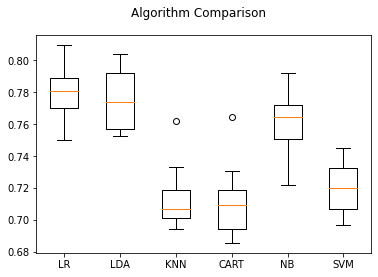

In [ ]:
# Compare Algorithms with the Algorithm Harness
# https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
from sklearn.metrics import roc_auc_score
from time import time
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
# scoring = 'roc_auc'
scoring = 'accuracy'
# you can also use other metrics to score your models: https://iqcode.com/code/python/sklearn-cross-val-score-scoring-options
for name, model in models:
    start = time()
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    model.fit(X_train, y_train)
    train_time = time() - start
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    predict_time = time()-start 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    #y_pred = model.predict_proba(X_train)[:, 1]
    #auc = roc_auc_score(y_train, y_pred)
    print(msg)
    print("Score for each of the 10 K-fold tests: ",cv_results)
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    #y_pred = model.predict(X_test)
    #print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print()
    
    
    
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
# once you have identified a couple of models... being to drill down and tweak it
# %%timeit -n 1
# if you uncomment %%timeit it will not put lr into memory
# Let's assume that the decision tree is the one we want to explore
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)  # in this step here... you are training the data to the model... ie:  fitting the data to the model

DecisionTreeClassifier()

In [ ]:
# This will give you the list of Hyperparameters of your model
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
# You have converted the dataframe into a list of dictionaries - validate the headers
type(X_train)
type(dv.feature_names_)
type(dt.feature_importances_)
dv.feature_names_

['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home',
 'income',
 'job',
 'marital',
 'price',
 'records',
 'seniority',
 'time']

In [ ]:
# These are the model properties.  You can call all of these
def get_properties(model):   
  return [i for i in model.__dict__ if i.endswith('_')] 
get_properties(dt)

['n_features_in_',
 'n_outputs_',
 'classes_',
 'n_classes_',
 'max_features_',
 'tree_']

In [ ]:
# Very important.  Once you have a trained model - interegate the coefficients to see WHAT is important
feature_names=dv.feature_names_
# Evaluate the coefficients to learn what the model thinks is important in the predictions.
for i,j in zip(feature_names, dt.feature_importances_): print('%.3f' % j, i)

0.091 age
0.121 amount
0.067 assets
0.027 debt
0.060 expenses
0.036 home
0.178 income
0.037 job
0.017 marital
0.118 price
0.084 records
0.121 seniority
0.043 time


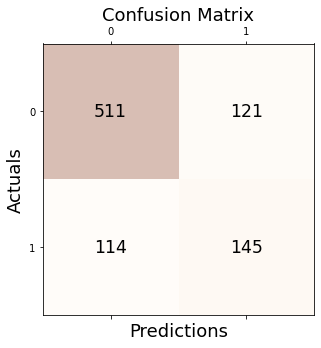

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
# predict_proba predicts the probability and predict just predicts the category
# y_pred = dt.predict_proba(X_test)[:, 1]
y_pred = dt.predict(X_test)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.81      0.81       632
           2       0.55      0.56      0.55       259

    accuracy                           0.74       891
   macro avg       0.68      0.68      0.68       891
weighted avg       0.74      0.74      0.74       891



In [ ]:
# Take a peek at your predictions:
# Take a look at the first 10 rows and compare the predictions.
pred_y = dt.predict(X_test)
print("The first 10 prediction {}".format(pred_y[:10].round(0)))
print("The real first 10 labels {}".format(y_test[:10]))

The first 10 prediction [1 2 1 1 2 1 1 1 1 2]
The real first 10 labels [2 1 1 1 2 1 1 1 1 1]


In [ ]:
# How to make predictions with BRAND NEW VALUES
type(df_train_full.head(1))

pandas.core.frame.DataFrame

In [ ]:
# Use double brackets around the iloc to force it to return a pandas dataframe and not a series
# Then you can convert ANY record into a dictionary.
# This is important because when you want to make a prediction - it must be in this format
df_train_full.iloc[[21]]

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
1043,3,1,36,32,1,1,3,35,0.0,0.0,0.0,950,1350


In [ ]:
# How to convert any pandas row into a dictionary... needed for predictions
df_train_full.iloc[[213]].to_dict('records')[0]

{'seniority': 12,
 'home': 2,
 'time': 60,
 'age': 28,
 'marital': 2,
 'records': 1,
 'job': 1,
 'expenses': 45,
 'income': 167.0,
 'assets': 3000.0,
 'debt': 1750.0,
 'amount': 250,
 'price': 1188}

In [ ]:
# How to convert any pandas row into a dictionary... needed for predictions
df_train_full.head(21).to_dict('records')[0]

{'seniority': 22,
 'home': 2,
 'time': 48,
 'age': 48,
 'marital': 2,
 'records': 1,
 'job': 1,
 'expenses': 60,
 'income': 110.0,
 'assets': 3000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1460}

In [ ]:
#item = df_train.head(1).to_dict('records')[0]
item = df_train_full.iloc[[213]].to_dict('records')[0]
actual = y_train[[213]]

In [ ]:
item


{'seniority': 12,
 'home': 2,
 'time': 60,
 'age': 28,
 'marital': 2,
 'records': 1,
 'job': 1,
 'expenses': 45,
 'income': 167.0,
 'assets': 3000.0,
 'debt': 1750.0,
 'amount': 250,
 'price': 1188}

In [ ]:
# The item to be predicted is passed in.  
def model_prediction(item, dv, model):
    X = dv.transform([item])
    y_pred = model.predict(X)
    return y_pred[0]

In [ ]:
# The item to be predicted is passed in. Probability Model 
def model_prediction_proba(item, dv, model):
    X = dv.transform([item])
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred[0]

In [ ]:
model_prediction(item,dv,dt)

1

In [ ]:
actual

array([1])

In [ ]:
model_prediction_proba(item,dv,dt)

0.0

In [ ]:
# How to convert any pandas row into a dictionary... needed for predictions
# This will give you a template that you can manipulate to create predictions with new values
df_train_full.iloc[[2]].to_dict('records')[0]

{'seniority': 2,
 'home': 5,
 'time': 36,
 'age': 19,
 'marital': 2,
 'records': 1,
 'job': 1,
 'expenses': 35,
 'income': 162.0,
 'assets': 4000.0,
 'debt': 100.0,
 'amount': 400,
 'price': 570}

In [ ]:
# The list above can be copied into here.  Take everything after a " : " and put it in a [] so you can pass it in as a pd.DF
# create a DataFrame by transforming scalar values to list   (toggle the weekend)

myItem = {'seniority': [1],
 'home': [4],
 'time': [136],
 'age': [19],
 'marital': [1],
 'records': [1],
 'job': [2],
 'expenses': [35],
 'income': [1162.0],
 'assets': [4000.0],
 'debt': [100.0],
 'amount': [400],
 'price': [570]}



In [ ]:
newDF = pd.DataFrame.from_dict(myItem)

In [ ]:
newDF.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,4,136,19,1,1,2,35,1162.0,4000.0,100.0,400,570


In [ ]:
item = newDF.to_dict('records')[0]

In [ ]:
model_prediction(item,dv,dt)

2

In [ ]:
# Hyperparameter Tuning... light...
# Look at the model parameters.   You can tune these.
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'min_samples_leaf': [1, 3],'max_depth': [4,6,8],'min_samples_split': [2,4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 4]},
             verbose=1)

In [ ]:
grid_search_cv.best_estimator_    # this will output the best values for the hyperparameters


DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, random_state=42)

In [ ]:
# Let's assume that the decision tree is the one we want to explore
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, random_state=42)

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz( 
 grid_search_cv.best_estimator_,
 out_file=('tree.dot'),
 feature_names=dv.feature_names_,
 class_names=None,
 filled=True,
)

In [ ]:
!pip install pydot
import pydot

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
